In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [2]:
data=pd.read_excel('Documents\\house.xlsx')
data

,Area,Price
0,1000,222500
1,2000,222600
2,2500,228000
3,3000,290000
4,3500,300000
5,4000,310000


In [3]:
a=data.Area.values
b=data.Price.values

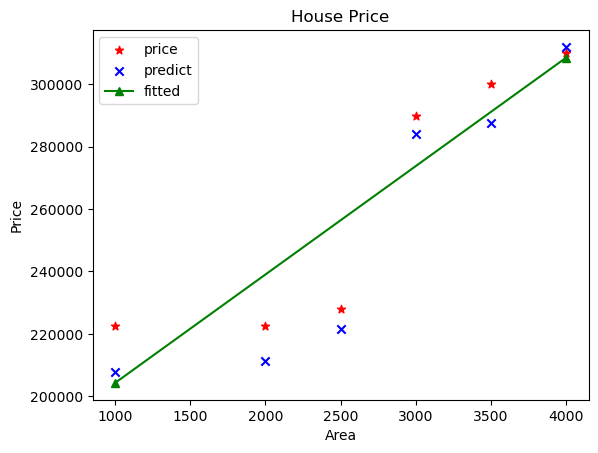

In [9]:
plt.scatter(a,b,color='red', marker='*',label='price')
plt.scatter(a,ypredict,color='blue', marker='x',label='predict')
plt.plot(X,y,color='green', marker='^',label='fitted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('House Price')
plt.legend()
plt.show()

In [5]:
reg=linear_model.LinearRegression()
reg.fit(data[['Area']],data.Price)

LinearRegression()

In [6]:
val=np.array([1100,1200,1500,3300,3400,4100]).reshape(-1,1)
ypredict=reg.predict(val)

H:\conda\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
reg.intercept_

169490.0

In [47]:
reg.coef_

array([34.76])

In [32]:
#y=m*x+b
price=reg.intercept_*2600+reg.coef_
price

array([4.40674035e+08])

In [8]:
X=np.array([min(data.Area),max(data.Area)])
y=reg.coef_*X+reg.intercept_

In [51]:
y

array([204250., 308530.])

### MULTIVARIATE REGRESSION ANALYIS

In [55]:
data2=pd.read_excel("Documents/Houseprice.xlsx")
data2

,Area,Bedrooms,Restroom,PriceK
0,2600,3.0,1,550
1,3000,4.0,3,565
2,3200,NaN,5,610
3,3600,4.0,2,540
4,4000,NaN,4,559


In [56]:
data2.median()

Area        3200.0
Bedrooms       4.0
Restroom       3.0
PriceK       559.0
dtype: float64

In [57]:
data2.Bedrooms.median()

4.0

In [58]:
data2['Bedrooms']=data2.Bedrooms.fillna(data2.Bedrooms.median())

In [59]:
data2

,Area,Bedrooms,Restroom,PriceK
0,2600,3.0,1,550
1,3000,4.0,3,565
2,3200,4.0,5,610
3,3600,4.0,2,540
4,4000,4.0,4,559


In [60]:
colname=data2.columns
colname

Index(['Area', 'Bedrooms', 'Restroom', 'PriceK'], dtype='object')

In [62]:
reg=linear_model.LinearRegression()
reg.fit(data2[['Area','Bedrooms','Restroom']],data2.PriceK)

LinearRegression()

In [63]:
reg.coef_

array([-0.02765306, -7.6122449 , 19.84693878])

In [64]:
reg.intercept_

624.8877551020407

In [66]:
reg.predict([[2500,2,3]])

H:\conda\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([600.07142857])

In [69]:
"""
y=m1*x+m2*x+m3*x+c
"""

'\ny=m1*x+m2*x+m3*x+c\n'

In [67]:
y=-0.02765306*2500+(-7.6122449*2)+(19.84693878*3)+624.8877551020407

In [68]:
print(y)

600.0714316420407


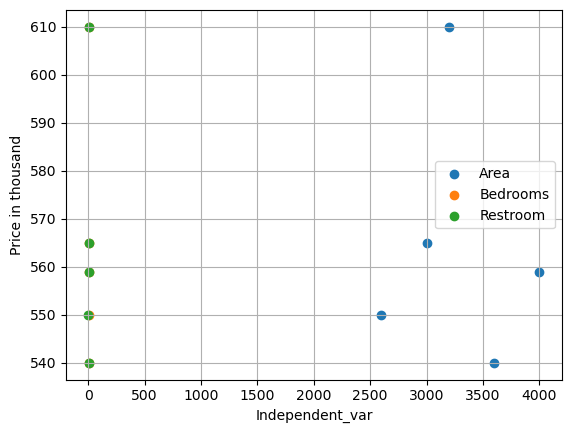

In [80]:
ind_var=['Area','Bedrooms','Restroom']
for var in ind_var:
    plt.scatter(data2[var],data2['PriceK'],label=var)
    
plt.xlabel('Independent_var')
plt.ylabel('Price in thousand')
plt.legend()
plt.grid()
plt.show()

    

### GRADIANT DESCENT ALGORITHM

	2.868		 0.708	 cost: 106.83333333333333	 iteration:0
	2.4257280000000003		 0.642288	 cost: 3.892669333333329	 iteration:1
	2.482976448		 0.6927598079999999	 cost: 1.513688779349333	 iteration:2
	2.464990695168		 0.7251710369279999	 cost: 1.4243695420027773	 iteration:3
	2.4584777547386882		 0.7597810670868479	 cost: 1.3880796973776168	 iteration:4
	2.4503552176581547		 0.7935404360624454	 cost: 1.3538909896114835	 iteration:5
	2.442595130087714		 0.8269160098160944	 cost: 1.3206209825223727	 iteration:6
	2.4348984135582743		 0.8598440843272317	 cost: 1.288220031742211	 iteration:7
	2.4273086367021763		 0.8923409100389859	 cost: 1.2566648679124786	 iteration:8
	2.4198176960935753		 0.9244105880672304	 cost: 1.2259333998674373	 iteration:9
	2.412425303766449		 0.9560589663108089	 cost: 1.196004126085458	 iteration:10
	2.4051300125431627		 0.9872915441872854	 cost: 1.1668561066023098	 iteration:11
	2.3979305697108333		 1.0181137898449237	 cost: 1.1384689480636982	 iteration:12
	2.3908257

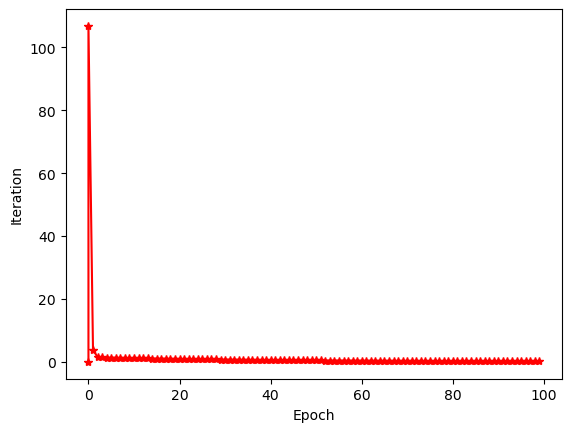

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
def gradient_descent (x,y):
    global error,iti
    m_init=0
    b_init=0
    n=len(x)
    LR=0.001
    maxit=100
    error=[0]
    iti=[0]
    
    for i in range(maxit):
        y_pred=m_init*x+b_init
        mse=(1/n)*sum([i**2 for i in (y-(y_pred))])
        error.append(mse)
        iti.append(i)
        dmdx=-(2*n)*sum(x*(y-(y_pred)))
        dbdy=-(2*n)*sum(y-(y_pred))
        m_init=m_init-(LR*dmdx)
        b_init=b_init-(LR*dbdy)
        print(f'\t{m_init}\t\t {b_init}\t cost: {mse}\t iteration:{i}')
            
x=np.array([1,2,3,4,5,6])
y=np.array([5,7,9,11,13,14])

gradient_descent(x,y)
plt.plot(iti,error, marker='*',color='red')
plt.xlabel('Epoch')
plt.ylabel('Iteration')
plt.show()
